In [13]:
!unzip Electricos.zip -d Electricos

Archive:  Electricos.zip
   creating: Electricos/Electricos/
  inflating: Electricos/Electricos/image.jpeg  
  inflating: Electricos/Electricos/image2.jpeg  
  inflating: Electricos/Electricos/image3.jpeg  
  inflating: Electricos/Electricos/image4.jpeg  
  inflating: Electricos/Electricos/image5.jpeg  
  inflating: Electricos/Electricos/image6.jpeg  
  inflating: Electricos/Electricos/image7.jpeg  
  inflating: Electricos/Electricos/image8.jpeg  
  inflating: Electricos/Electricos/image9.jpeg  
  inflating: Electricos/Electricos/image10.jpeg  
  inflating: Electricos/Electricos/image11.jpeg  
  inflating: Electricos/Electricos/image12.jpeg  
  inflating: Electricos/Electricos/image13.jpeg  
  inflating: Electricos/Electricos/image14.jpeg  
  inflating: Electricos/Electricos/image15.jpeg  
  inflating: Electricos/Electricos/image16.jpeg  
  inflating: Electricos/Electricos/image17.jpeg  
  inflating: Electricos/Electricos/image18.jpeg  
  inflating: Electricos/Electricos/image19.jpeg  

In [14]:
!unzip Vehiculos.zip -d Vehiculos

Archive:  Vehiculos.zip
   creating: Vehiculos/Vehiculos/
  inflating: Vehiculos/Vehiculos/image32.png  
  inflating: Vehiculos/Vehiculos/D_NQ_684088-MCO79771750910_102024-V.webp  
  inflating: Vehiculos/Vehiculos/D_NQ_802185-MCO79867402486_102024-V.webp  
  inflating: Vehiculos/Vehiculos/D_NQ_855937-MCO69578153766_052023-V.webp  
  inflating: Vehiculos/Vehiculos/D_Q_NP_2X_977155-MCO80283786053_102024-T.webp  
  inflating: Vehiculos/Vehiculos/D_NQ_689627-MCO80454468469_112024-V.webp  
  inflating: Vehiculos/Vehiculos/D_NQ_762278-MCO79733328341_102024-V.webp  
  inflating: Vehiculos/Vehiculos/D_NQ_924428-MCO79989304149_102024-V.webp  
  inflating: Vehiculos/Vehiculos/Mazda-CX-9-Silver.png  
  inflating: Vehiculos/Vehiculos/42bf8986-025f-4bcc-8a6c-8dabb3d18670-IMG-LHR756-0.jpg  
  inflating: Vehiculos/Vehiculos/28833bd8-273a-43df-a897-17cda6a58175_1725302797037_l.jpg  
  inflating: Vehiculos/Vehiculos/2019-mazda-cx-5-signature-fuel-efficient-suv-side-profile.jpg  
  inflating: Vehiculos/

In [15]:
!rm -rf Vehiculos/Vehiculos.zip
!rm -rf Electricos/Electricos.zip

In [16]:
!mkdir dataset
!cp -r Vehiculos/Vehiculos dataset/
!cp -r Electricos/Electricos dataset/

In [17]:
#Aumento de Datos
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale = 1./255,  #Normalizar imgenes
    rotation_range = 10,   #Transformacion de Imagenes
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    shear_range = 5,
    zoom_range = [0.7, 1.3],
    validation_split = 0.2  #Tomar el 20% de imagenes para pruebas
)

In [18]:
data_gen_entrenamiento = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224, 224),
                                                     batch_size=32, shuffle=True,
                                                     subset="training") #80% - Entrenamiento

data_gen_pruebas = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224, 224),
                                                     batch_size=32, shuffle=True,
                                                     subset="validation") #20% - Pruebas

Found 785 images belonging to 2 classes.
Found 195 images belonging to 2 classes.


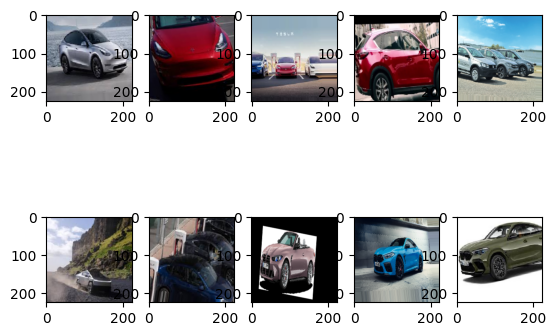

In [19]:
import matplotlib.pyplot as plt

for imagenes, etiquetas in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(imagenes[i])

  break
plt.show()

In [20]:
#Descargar modelo pre-entrenado
import tensorflow as tf
import tensorflow_hub as hub

url = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224, 3))

In [21]:
#Congelar las capas
mobilenetv2.trainable=False

In [22]:
# Cargar MobileNetV2 sin la capa superior (OJO) y especificando el tamaño de entrada
mobilenetv2 = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                                include_top=False,
                                                pooling='avg')  # podriamos usar este 'avg' para un promedio global

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
#Congelar las capas
mobilenetv2.trainable=False

In [24]:
# Cargar MobileNetV2 sin la capa superior (OJO) y especificando el tamaño de entrada
mobilenetv2 = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                                include_top=False,
                                                pooling='avg')  # podriamos usar este 'avg' para un promedio global

In [25]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2, activation="softmax")
])

In [26]:
modelo.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [28]:
EPOCAS = 5
entrenamiento = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data = data_gen_pruebas
)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 190s 7s/step - accuracy: 0.9620 - loss: 0.1082 - val_accuracy: 0.6821 - val_loss: 8.7281
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 196s 7s/step - accuracy: 0.9593 - loss: 0.1436 - val_accuracy: 0.7179 - val_loss: 5.6674
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 209s 7s/step - accuracy: 0.9547 - loss: 0.1162 - val_accuracy: 0.3641 - val_loss: 6.8557
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 197s 7s/step - accuracy: 0.9813 - loss: 0.0655 - val_accuracy: 0.6051 - val_loss: 3.1922
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 204s 7s/step - accuracy: 0.9813 - loss: 0.0497 - val_accuracy: 0.5179 - val_loss: 5.8335


In [29]:
from PIL import Image
import cv2

def categorizar(ruta):
  img = Image.open(ruta)
  img = img.convert("RGB")
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [31]:
ruta = "elect.jpg" #esta es la ruta para comparar las imagenes
prediccion = categorizar(ruta)
print(prediccion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
0
